<a href="https://colab.research.google.com/github/rutujahingankar/Health-insurance-cross-sell-prediction/blob/main/Individual_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Loading Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading dataset
df=pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
X=df.drop(columns=['id','Driving_License','Policy_Sales_Channel','Vintage','Response'])# independent variable
y = df['Response']# dependent variable

In [ ]:
# Fill any numerical NaNs with mode()

fill_mode = lambda col: col.fillna(col.mode())
X = X.apply(fill_mode, axis=0)
df = df.apply(fill_mode, axis=0)

#Model Building

In [ ]:
# check for imbalance in data 
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

* We can clearly see that there is a huge difference between the data set. 
* Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. So solving this issue we use resampling technique.


In [ ]:
#Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


# Splitting the data in train and test sets

In [ ]:
X_train, X_test ,y_train, y_test=  train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((468158, 7), (200640, 7), (468158,), (200640,))

In [ ]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [ ]:
#Importing Logistic Regression
model= LogisticRegression(random_state=42)
model=model.fit(X_train, y_train)
#Making prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

**Model** **Evaluation**

In [ ]:
# Evaluation
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)

recall_score :  0.976100453713285
precision_score : 0.7071892503658422
f1_score : 0.8201651165221027
accuracy_score : 0.7855811403508772
ROC_AUC Score: 0.8341983171030103


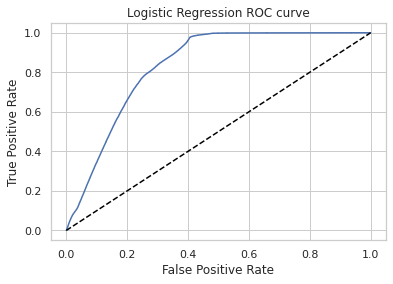

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, prob)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

**confusion_matrix**

[[59517 40619]
 [ 2402 98102]]


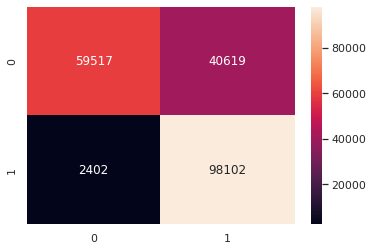

In [ ]:
matrix= confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

* A way to evaluate the results is by the confusion matrix, which shows the correct and incorrect predictions for each class.

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61919
           1       0.98      0.71      0.82    138721

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



#RandomForest Classifier

In [ ]:
RF_model= RandomForestClassifier()
RF_model= RF_model.fit(X_train, y_train)
#Making prediction
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

**Model Evaluation**

In [ ]:
# Evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)

recall_score :  0.9848961235373717
precision_score : 0.8639180296391977
f1_score : 0.9204489450535145
accuracy_score : 0.9147228867623605
ROC_AUC Score: 0.9231397914689912


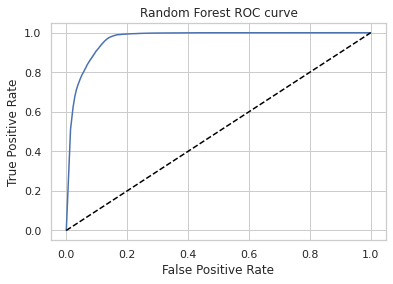

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

**confusion_matrix**

[[84544 15592]
 [ 1518 98986]]


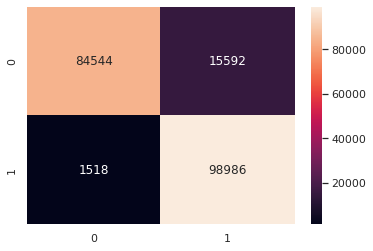

In [ ]:
matrix= confusion_matrix(y_test,rf_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     86062
           1       0.98      0.86      0.92    114578

    accuracy                           0.91    200640
   macro avg       0.91      0.92      0.91    200640
weighted avg       0.92      0.91      0.92    200640



#XGBoost

In [ ]:
XG_model= XGBClassifier()
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

**Model** **Evaluation**

In [ ]:
# Evaluation
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)

recall_score :  0.9335847329459523
precision_score : 0.7339507669683435
f1_score : 0.8218178633208523
accuracy_score : 0.7972139154704945
ROC_AUC Score: 0.8211299735197491


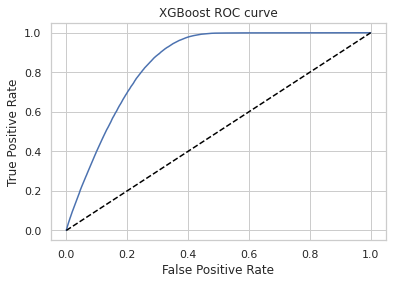

In [ ]:
fpr, tpr, _ = roc_curve(y_test, XG_prob)

plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

**confusion_matrix**

[[66124 34012]
 [ 6675 93829]]


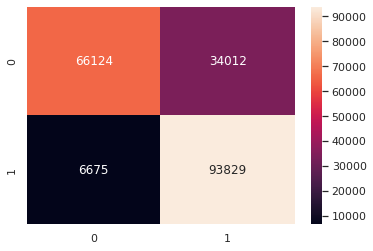

In [ ]:
matrix= confusion_matrix(y_test,XG_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76     72799
           1       0.93      0.73      0.82    127841

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



#Conclusion

* Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required.
* Through Exploratory Data Analysis,we observed that customers belonging to youngAge are more interested in vehicle response.while Young people below 30 are not interested in vehicle insurance. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having damaged vehicles are more likely to be interested in vehicle insurance. 
* The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.
* For Feature Selection, we applied the Mutual Information technique. Here we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two.
* We observed that the target variable was highly imbalanced.So this issue was solved by using Random Over Sample resampling technique. 
* we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.
* Further, we applied Machine Learning Algorithms to determine whether a customer would be interested in Vehicle Insurance.For the logistic regression we got an accuracy of 78% and for the XGBClassifier we got the aacuracy of 79% whereas, Randomforest  and Decision tree are giving us almost similar result of accuracy and ROC_AUC which is 91% and 92% respectively.So, we selected our *best model* as the model with an accuracy score of 91% i.e Random Forest model and Decision Tree this model preform better.